In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re

rcParams["figure.dpi"] = 300
rcParams["text.usetex"] = True

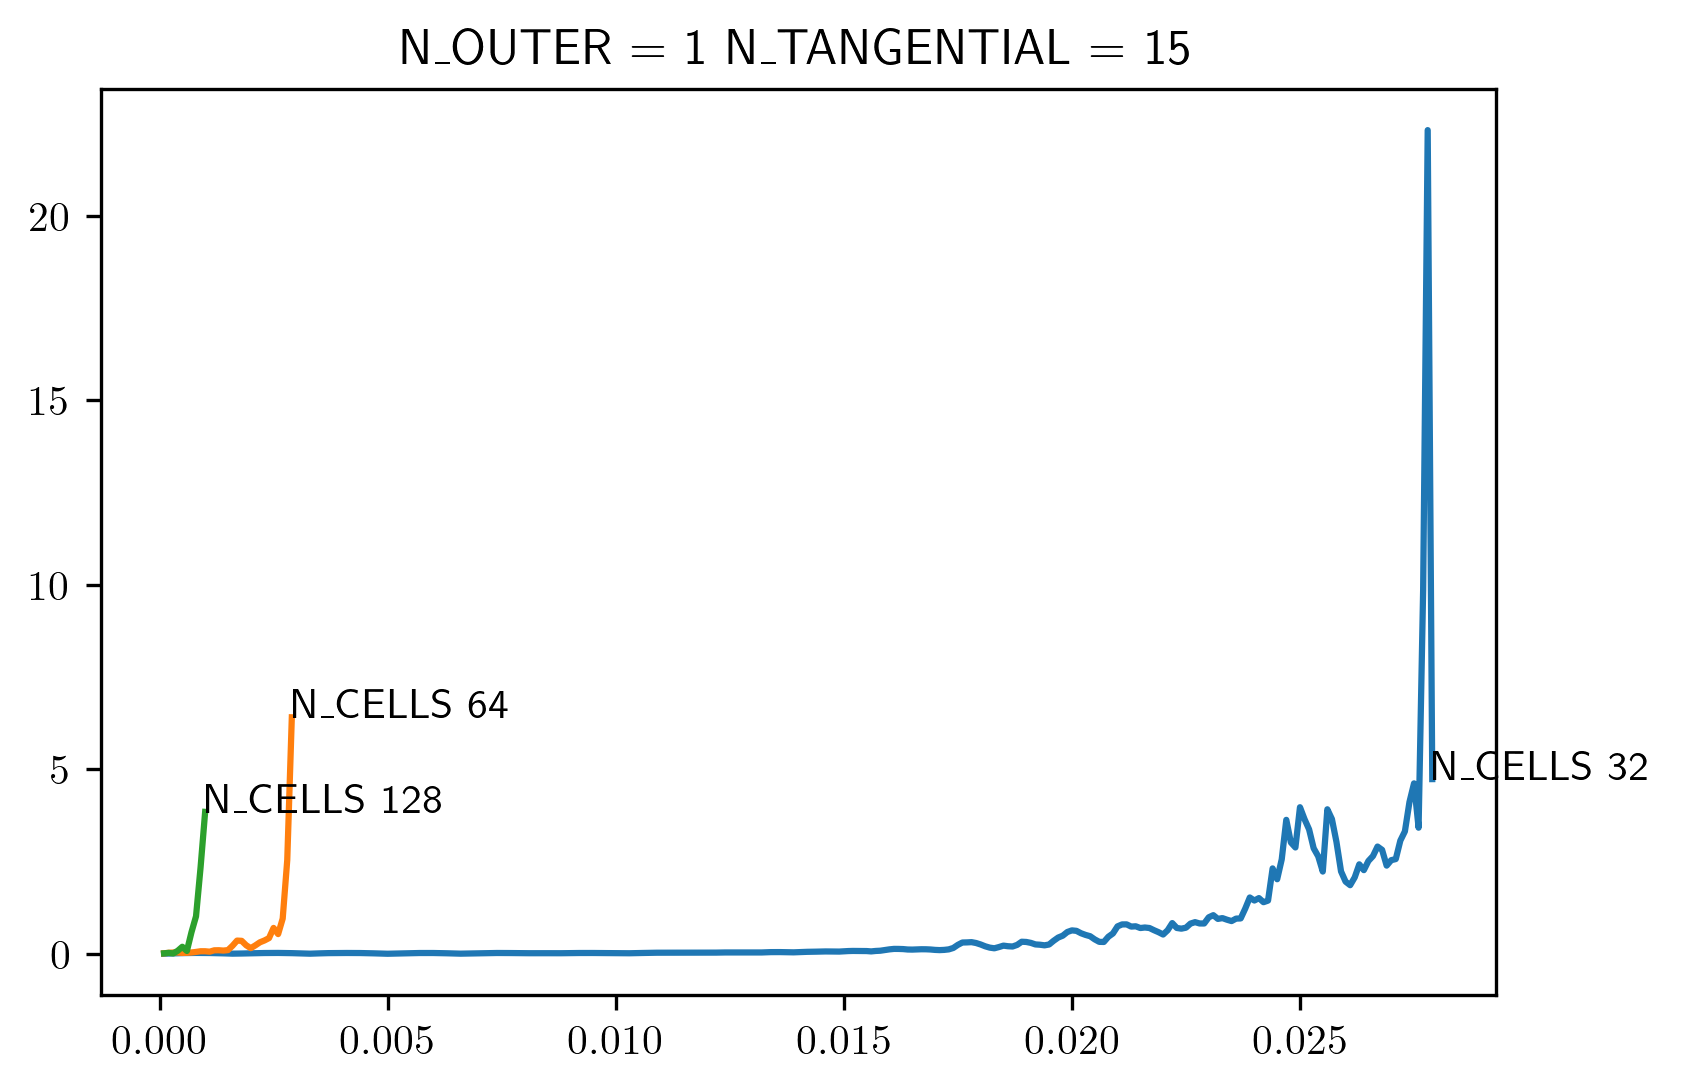

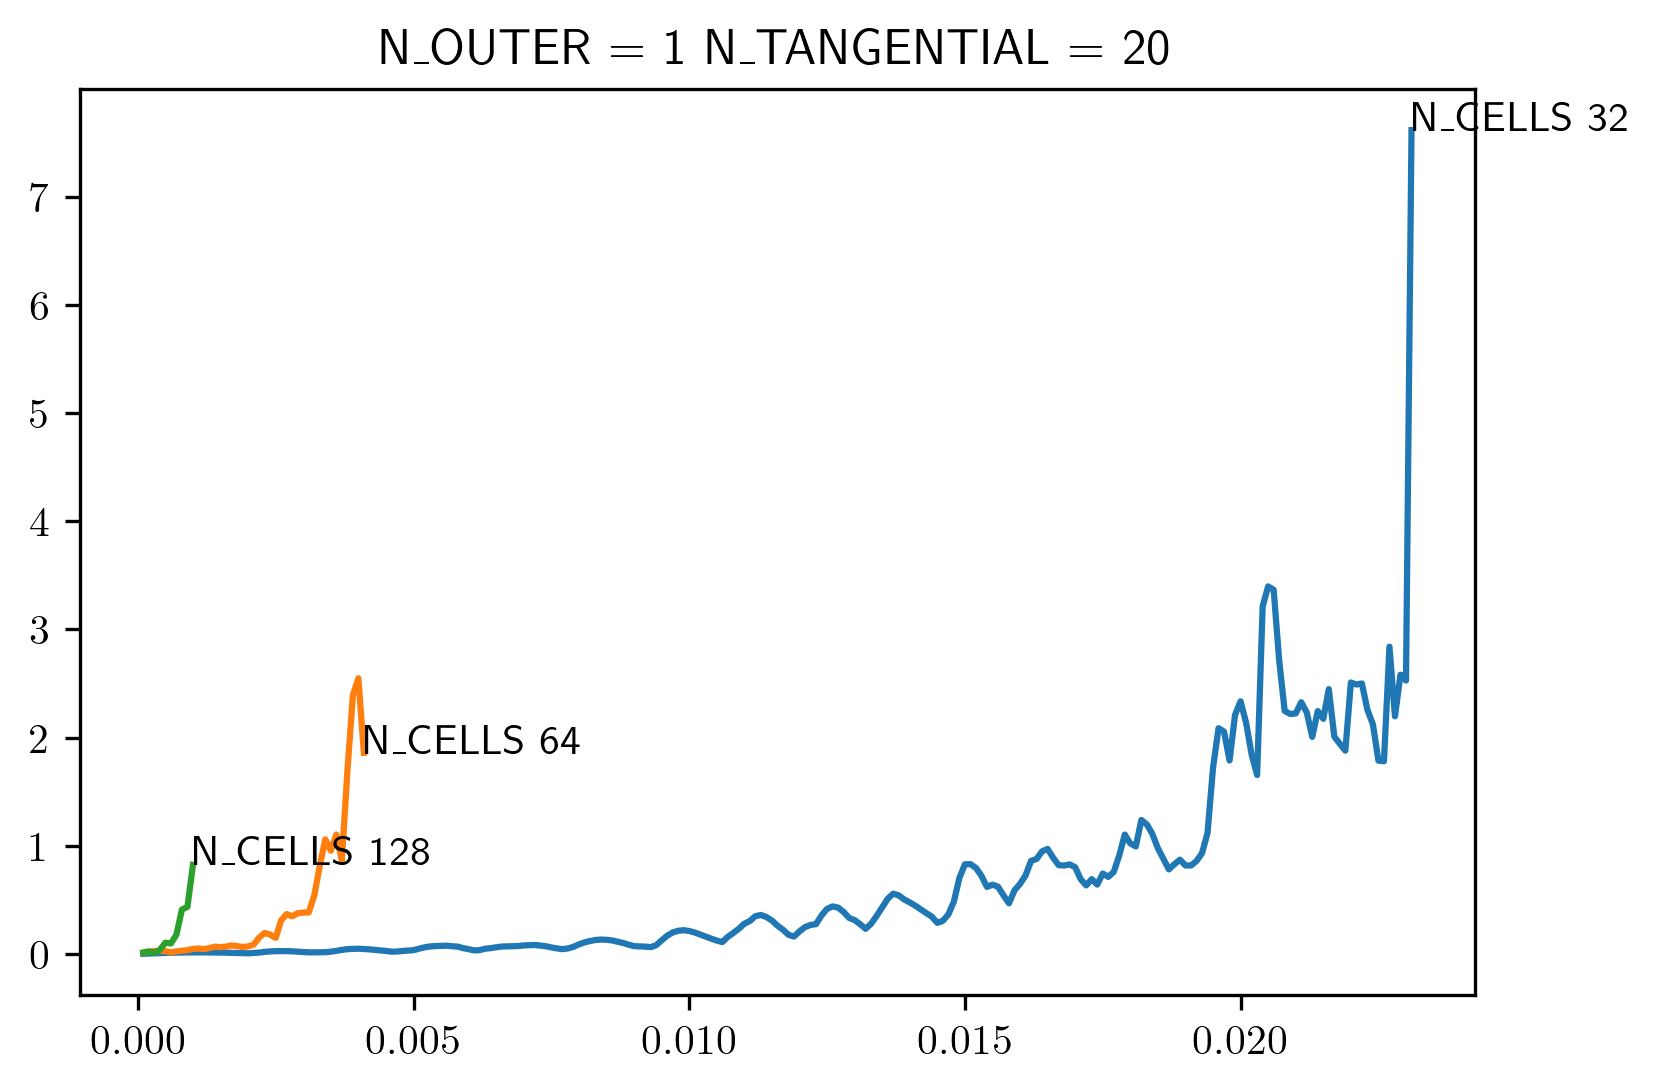

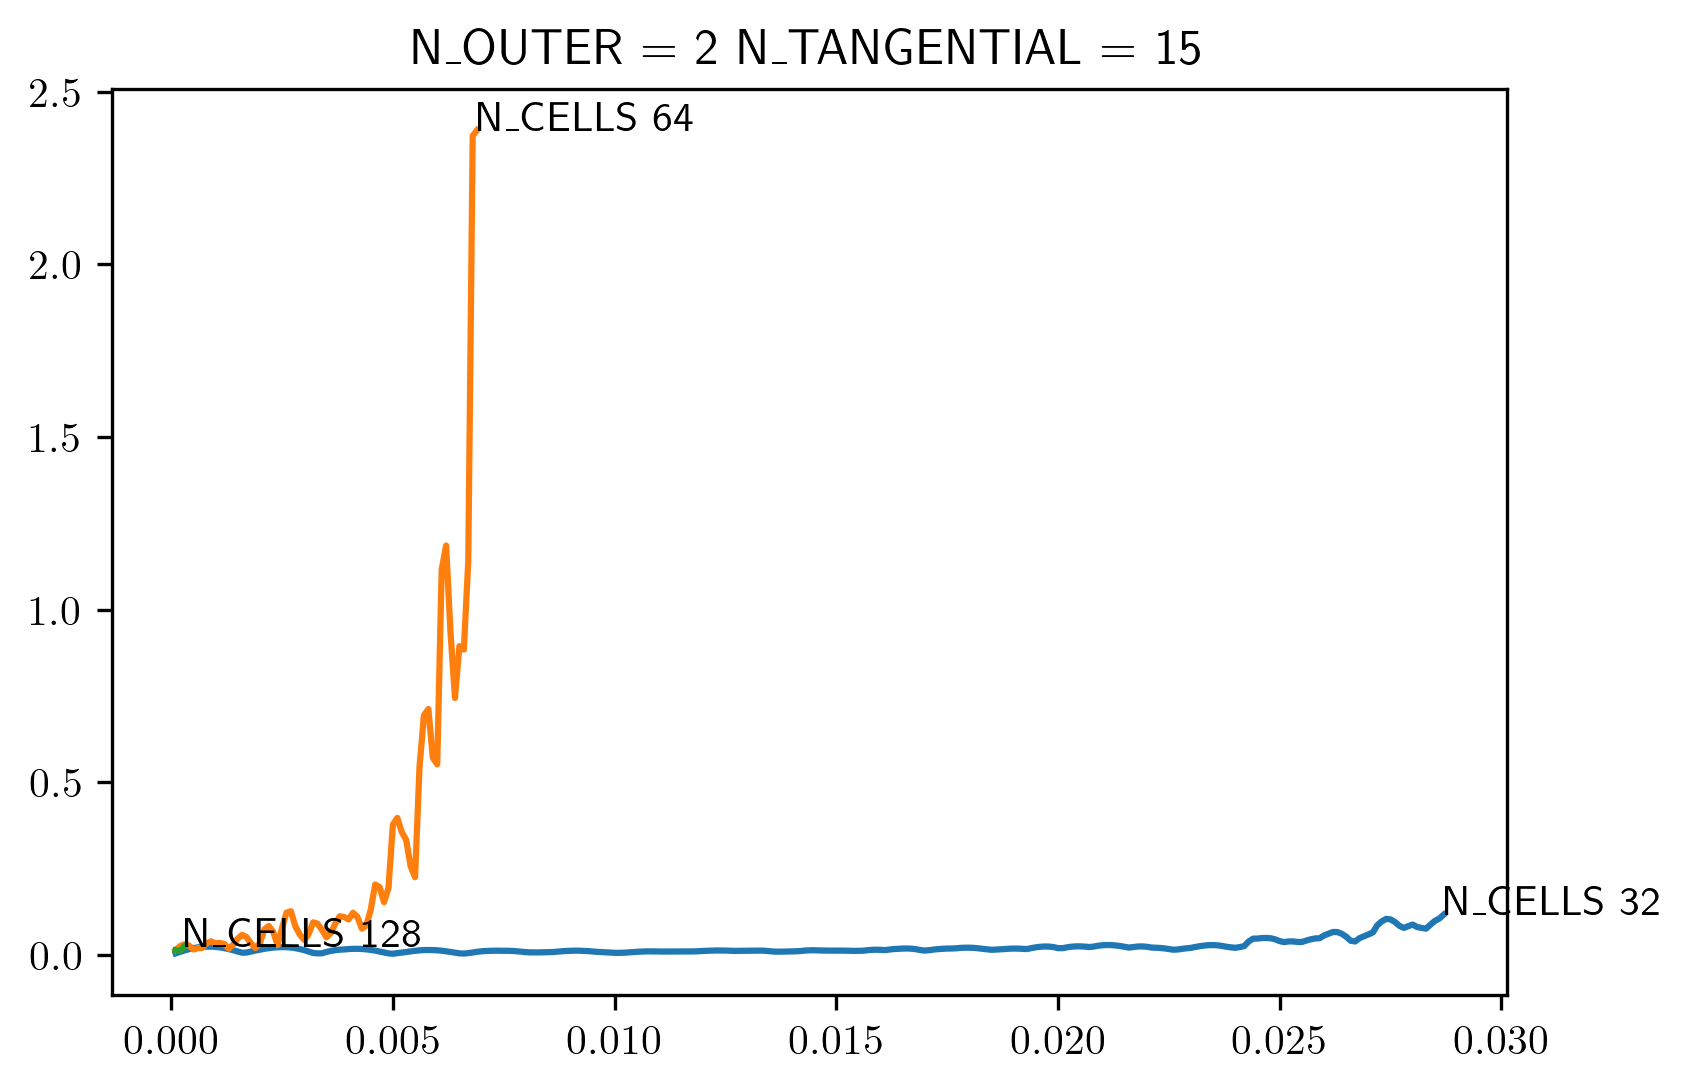

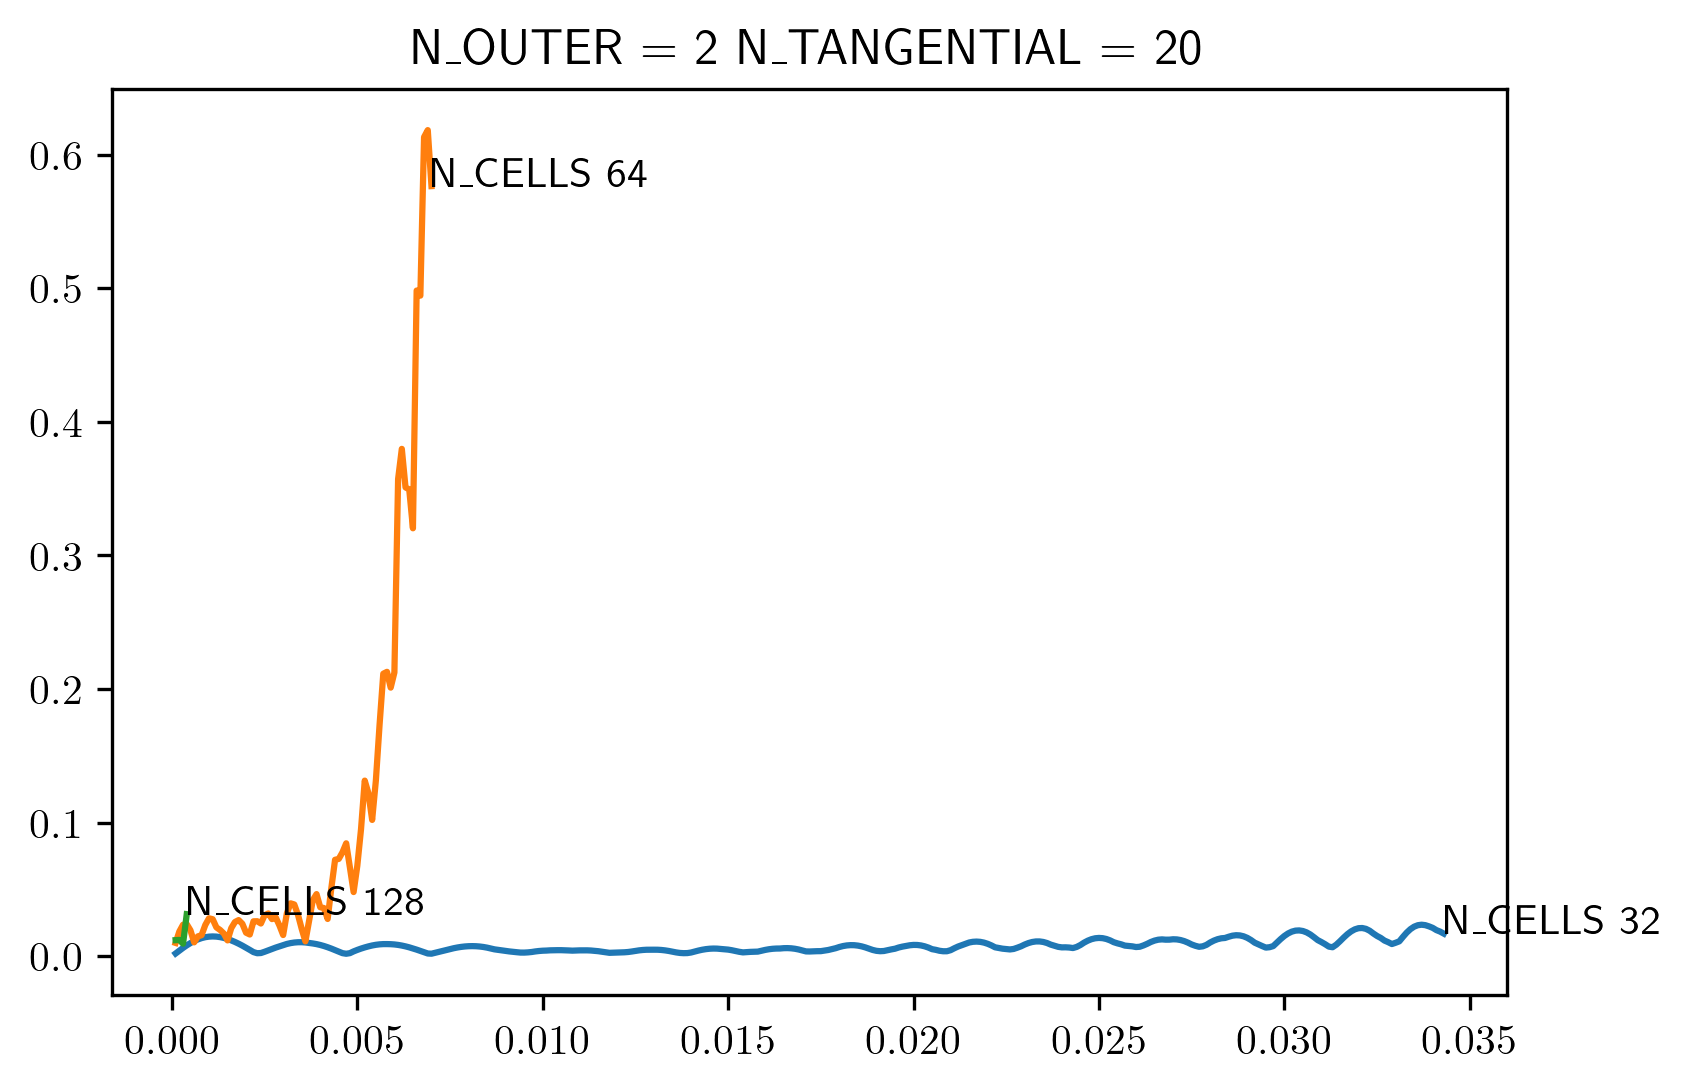

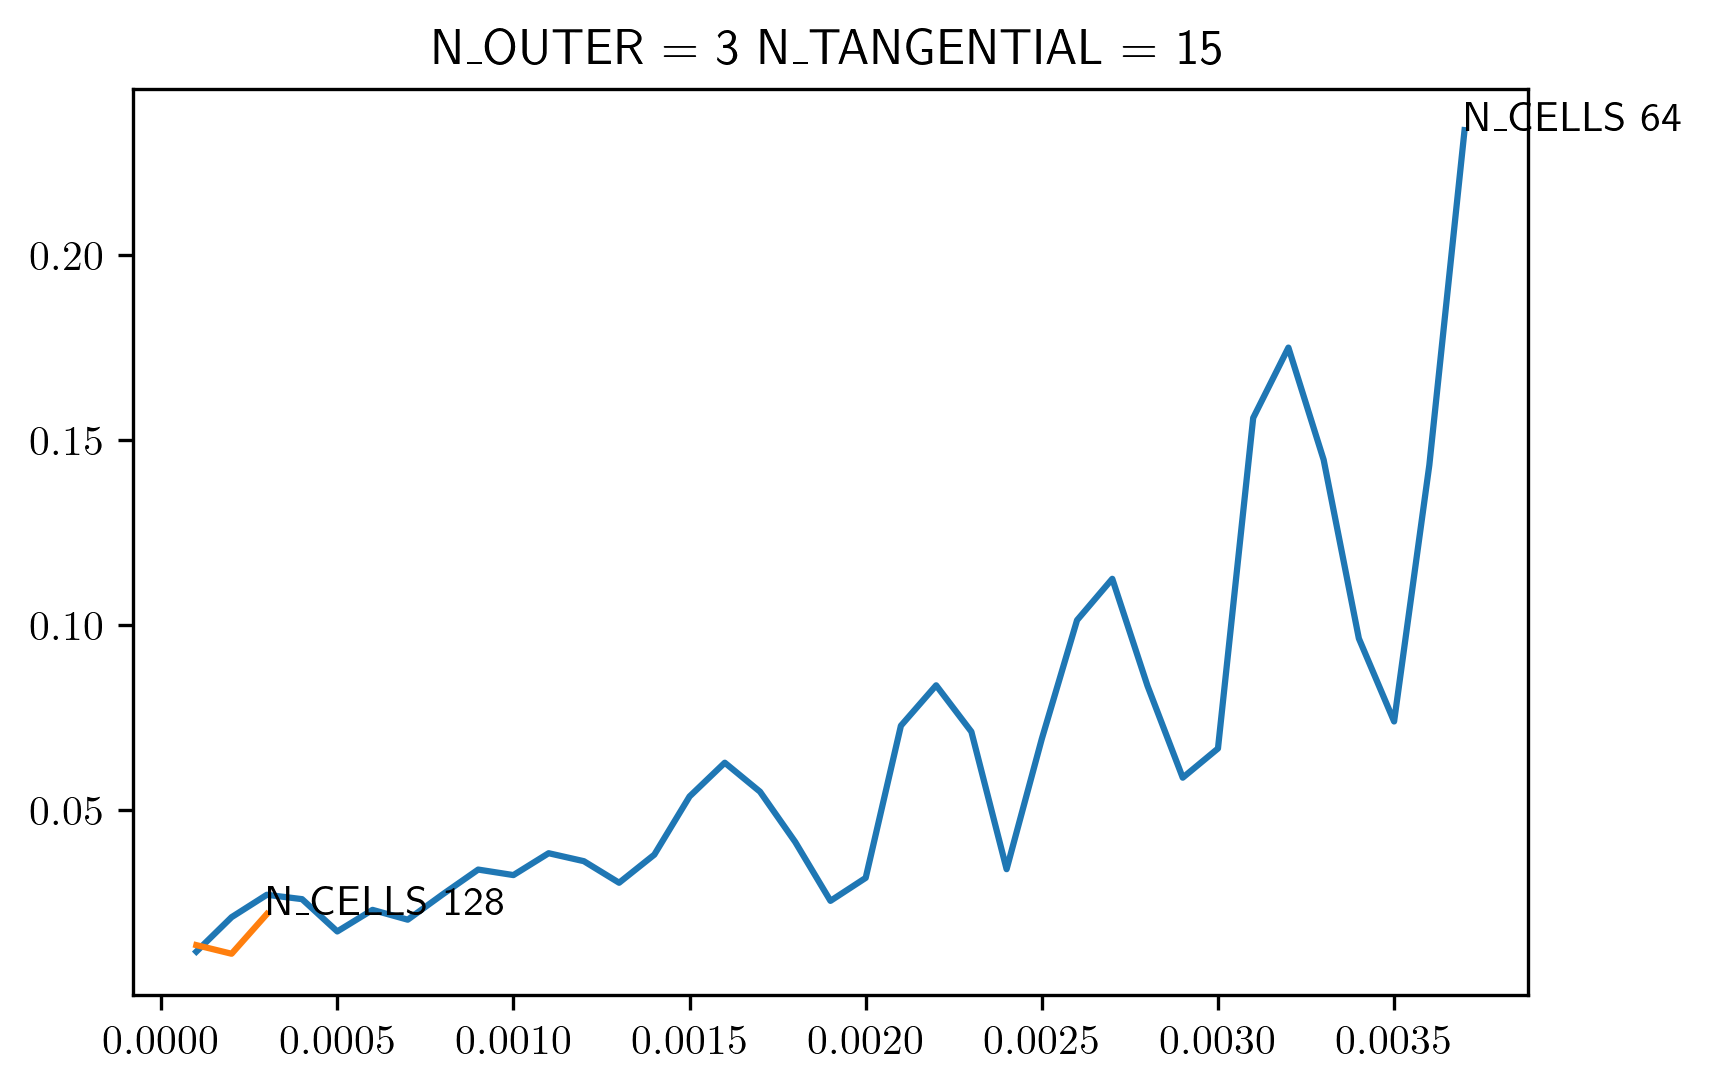

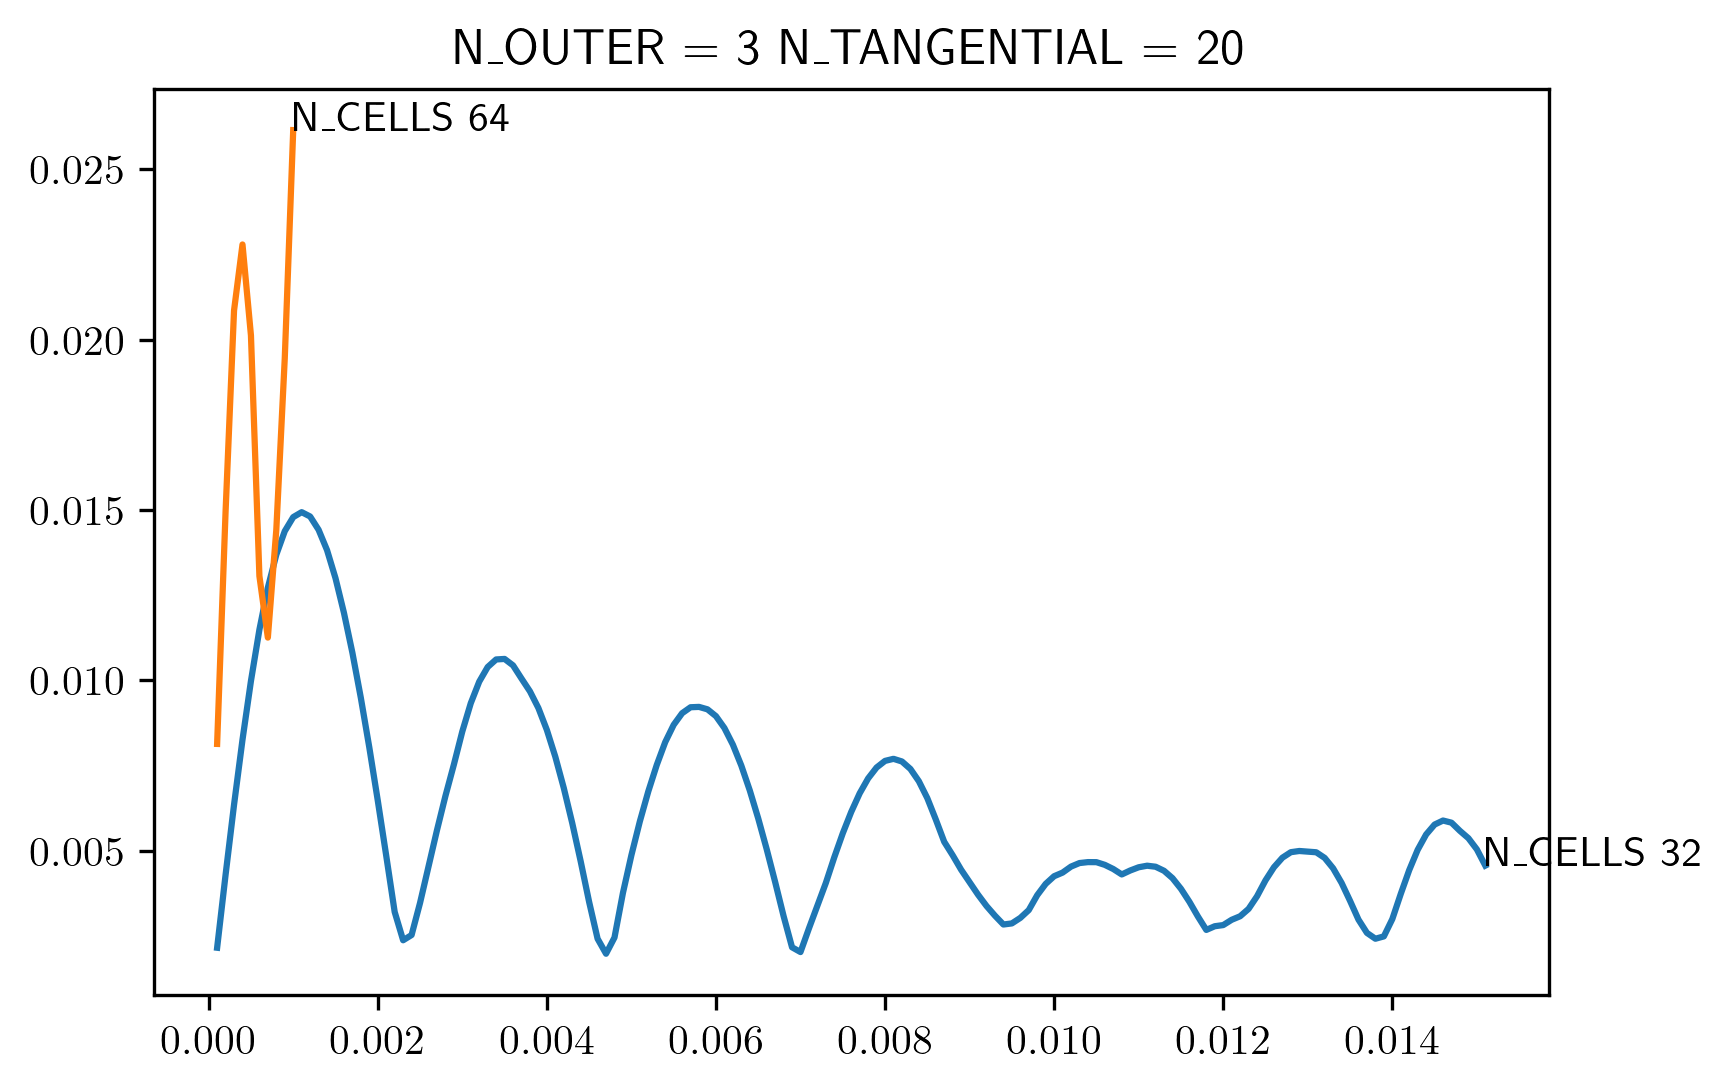

In [2]:
dframe = pd.read_csv("divNormal.csv", header=2)

n_outer_list = dframe["N_OUTER"].unique()
n_tangential_list = dframe["N_TANGENTIAL_AVERAGE"].unique()

for n_outer in n_outer_list:
    for n_tangential in n_tangential_list:
        dframe_slice = dframe[dframe["N_OUTER"] == n_outer]
        dframe_slice = dframe_slice[dframe_slice["N_TANGENTIAL_AVERAGE"] == n_tangential]
        n_cells_list = dframe_slice["N_CELLS"].unique()
        for n_cells in n_cells_list:
            dframe_final = dframe_slice[dframe_slice["N_CELLS"] == n_cells]
            plt.plot(dframe_final["Time"], dframe_final["max"], label=n_cells)
            label_x = dframe_final["Time"].iloc[-1]
            label_y = dframe_final["max"].iloc[-1]
            plt.annotate("N\_CELLS %s" % n_cells, (label_x,label_y))
          
        plt.title("N\_OUTER = %s N\_TANGENTIAL = %s" % (n_outer, n_tangential))
        plt.show()